In [138]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
import gc 
import datetime 

%matplotlib inline
plt.style.use('ggplot')

#accesing data 
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'

zipresp = urlopen(zipurl) #new file on hdd
tempzip = open("tempfile.zip", "wb") #writing to a new file 
tempzip.write(zipresp.read())
tempzip.close()
zf = ZipFile("tempfile.zip")
zf.extractall(path = '')
zf.close()



In [139]:
%ls

 Volume in drive D is Bordello
 Volume Serial Number is EAB6-1FA0

 Directory of d:\Analiza Danych\E-commerce store

12.12.2020  14:34    <DIR>          .
12.12.2020  14:34    <DIR>          ..
03.01.2020  21:35           801�254 Case Study 2 - Retail Product Sales Analytics.ipynb
18.12.2020  00:30        45�580�638 ecommerce_data.csv
18.12.2020  00:00           934�127 Products Sales Analysis.ipynb
18.12.2020  00:30         7�453�387 tempfile.zip
               4 File(s)     54�769�406 bytes
               2 Dir(s)  112�273�588�224 bytes free


In [140]:
csv_file = r"ecommerce_data.csv"
df = pd.read_csv(csv_file, encoding= 'ISO-8859-1')

In [141]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [143]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [144]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [145]:
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [146]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [148]:
df_no_missing_values = df.dropna()

In [149]:
df_no_missing_values.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [150]:
df_no_missing_values.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [151]:
df2 = df_no_missing_values.copy()

In [152]:
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


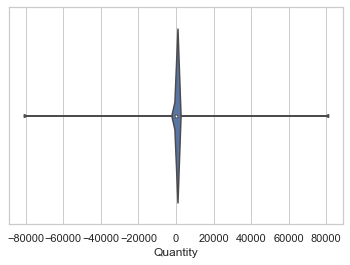

In [153]:
sns.set(style="whitegrid")
ax = sns.violinplot(x = df2['Quantity'])

In [154]:
df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


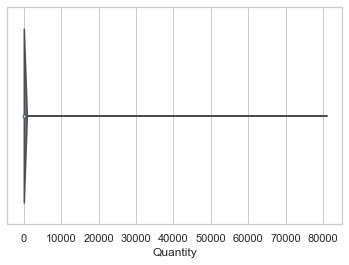

In [155]:
ax = sns.violinplot(x=df2.Quantity)

In [156]:
df2['AmountSpent'] = df2.Quantity * df.UnitPrice
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [157]:
# data columns handling and creation
df2["YearMonth"] = df2.InvoiceDate.dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [158]:
P = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']

df2 = df.join(pd.concat((getattr(df2['InvoiceDate'].dt,i).rename(i) for i in P), axis=1)) 
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,335.0,48.0,4.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,335.0,48.0,4.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,335.0,48.0,4.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,335.0,48.0,4.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,335.0,48.0,4.0


In [159]:
df2.dayofweek.unique()

array([ 2., nan,  3.,  4.,  6.,  0.,  1.])

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   year         397924 non-null  float64       
 9   month        397924 non-null  float64       
 10  day          397924 non-null  float64       
 11  dayofweek    397924 non-null  float64       
 12  dayofyear    397924 non-null  float64       
 13  weekofyear   397924 non-null  float64       
 14  quarter      397924 non-null  float64       
dtypes: datetime64[ns](1), float64(9), 

In [161]:
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010.0,12.0,1.0,3.0,335.0,48.0,4.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,3.0,335.0,48.0,4.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010.0,12.0,1.0,3.0,335.0,48.0,4.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,3.0,335.0,48.0,4.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,3.0,335.0,48.0,4.0


## EDA

Exploratory Data Analysis

In [162]:
df2["CustmerID"] = df2["CustomerID"].astype(str)

In [163]:
sales_per_customer = df2.groupby(by=["CustomerID", "Country"], as_index=False)["Quantity"].sum().sort_values(by="Quantity", ascending=False)
sales_per_customer.columns = ['CustomerID', 'Country', "NumberOfSales"]


In [164]:
sales_per_customer.head()

,CustomerID,Country,NumberOfSales
1711,14646.0,Netherlands,196719
57,12415.0,Australia,77242
1903,14911.0,EIRE,77180
3766,17450.0,United Kingdom,69029
4241,18102.0,United Kingdom,64122


In [165]:
 mean_quantity_per_customer = df2.groupby(['CustomerID','Country'],).Quantity.mean().sort_values(ascending = False)
 mean_quantity_per_customer.columns = ["CustomerID", "Country","MeanOfSales"]

In [166]:
mean_quantity_per_customer = pd.DataFrame(mean_quantity_per_customer)
mean_quantity_per_customer.head(10)

,,Quantity
CustomerID,Country,
13256.0,United Kingdom,12540.0
13135.0,United Kingdom,4300.0
16754.0,United Kingdom,2140.0
16308.0,United Kingdom,2000.0
14609.0,United Kingdom,1756.5
15118.0,United Kingdom,1440.0
15195.0,United Kingdom,1404.0
12875.0,United Kingdom,1009.5
13848.0,United Kingdom,740.0


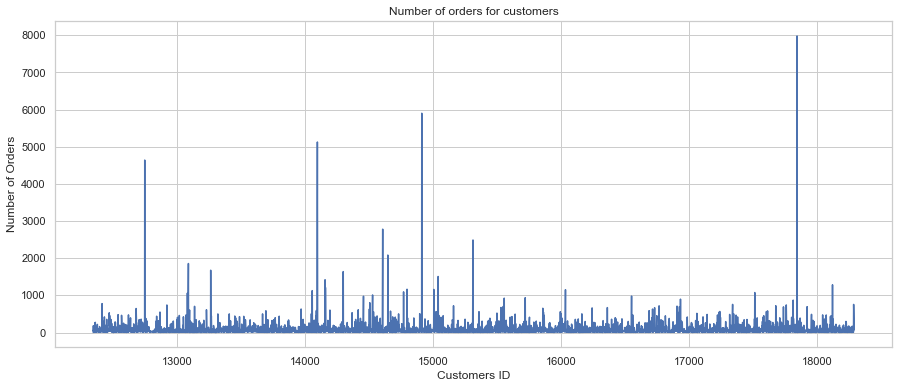

In [167]:
orders = df2.groupby(['CustomerID', 'Country'], as_index=False).InvoiceNo.count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel("Customers ID")
plt.ylabel("Number of Orders")
plt.title('Number of orders for customers')
plt.show()

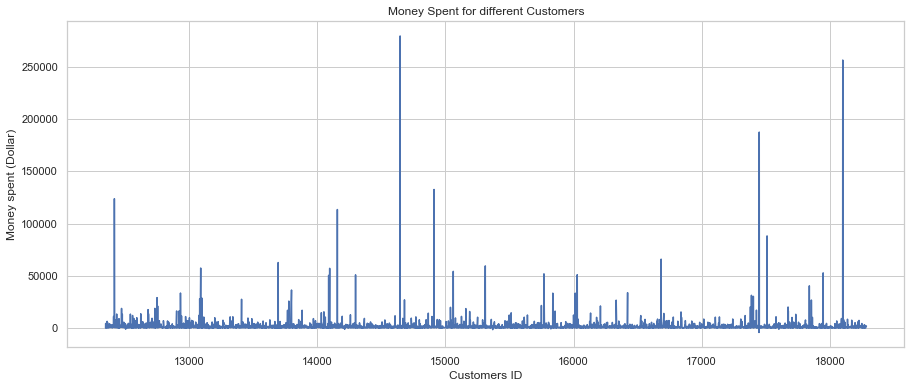

In [168]:
df2['AmountSpent'] = df2["Quantity"] * df2["UnitPrice"]
money_spent = df2.groupby(["CustomerID", "Country"], as_index=False).AmountSpent.sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [169]:
spent_per_customer = df2.groupby(["CustomerID", "Country"], as_index=False).AmountSpent.sum().sort_values(by="AmountSpent", ascending = False)

spent_per_customer.columns = ["CustomerID", "Country", "TotalSpent"]
spent_per_customer.head(5)

,CustomerID,Country,TotalSpent
1711,14646.0,Netherlands,279489.02
4241,18102.0,United Kingdom,256438.49
3766,17450.0,United Kingdom,187482.17
1903,14911.0,EIRE,132572.62
57,12415.0,Australia,123725.45


# Analysis by Country

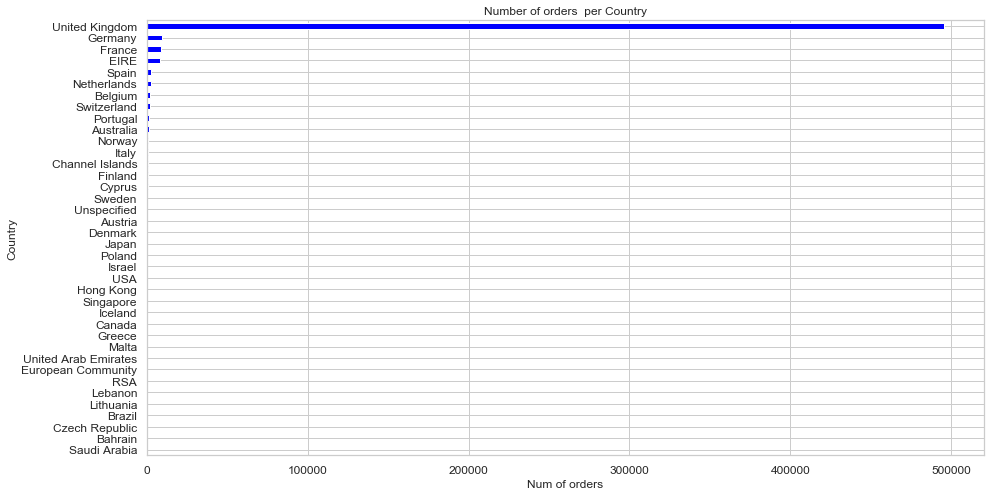

In [170]:
orders_per_country = df2.groupby('Country').InvoiceDate.count().sort_values()

plt.subplots(figsize=(15,8))
orders_per_country.plot(kind = 'barh', fontsize=12, color="blue")
plt.xlabel('Num of orders', fontsize=12)
plt.title('Number of orders  per Country', fontsize=12)
plt.show()

In [171]:
# UK needs to be excluded, takes up to much data -makes rest unreadable
orders_per_country_wo_UK = orders_per_country.copy()
del orders_per_country_wo_UK['United Kingdom']


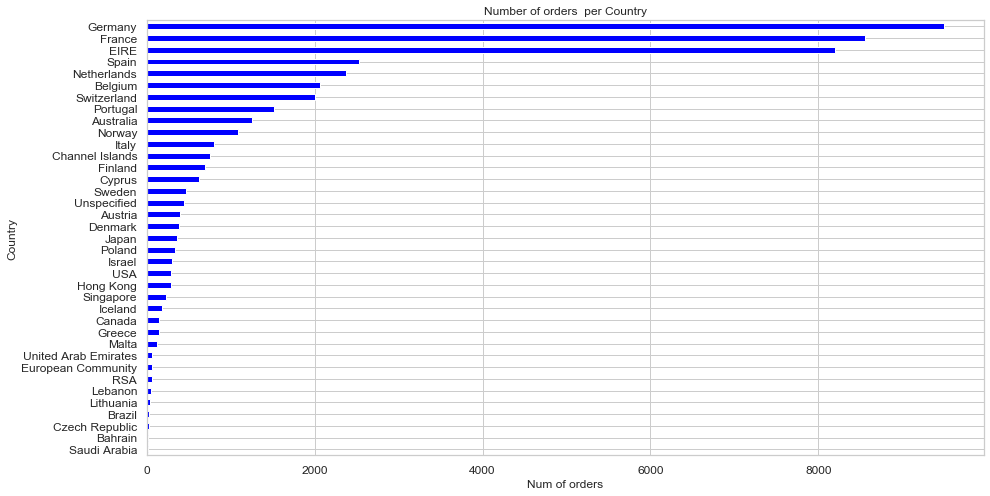

In [172]:
plt.subplots(figsize=(15,8))
orders_per_country_wo_UK.plot(kind = 'barh', fontsize=12, color="blue")
plt.xlabel('Num of orders', fontsize=12)
plt.title('Number of orders  per Country', fontsize=12)
plt.show()

In [173]:
amount_spent_per_country_wo_UK = df2.groupby('Country').AmountSpent.sum().sort_values()
del amount_spent_per_country_wo_UK['United Kingdom']

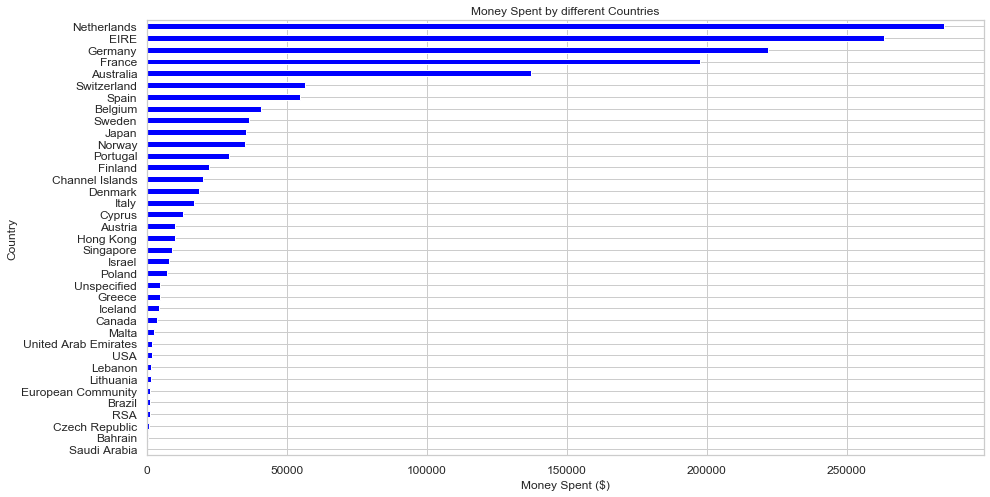

In [174]:
plt.subplots(figsize=(15,8))
amount_spent_per_country_wo_UK.plot(kind = 'barh', fontsize=12, color="blue")
plt.xlabel('Money Spent ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

# Item Trends

In [175]:
#Setting index of a data frame to the invoice date.
items_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq="M"),'StockCode']).Quantity.sum()
items_df.head(10)

InvoiceDate  StockCode
2010-12-31   10002        251
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        154
             10133        130
             10135        411
             11001         73
             15034         45
Name: Quantity, dtype: int64

In [176]:
#Instead of method chaining it could be done but overwriting the newly created DF.
last_months_ranking_of_items = items_df.loc['2011-11-30'].reset_index().sort_values(by = 'Quantity', ascending=False)
last_months_ranking_of_items.head()

,InvoiceDate,StockCode,Quantity
1621,2011-11-30,23084,14883
2502,2011-11-30,84826,12551
858,2011-11-30,22197,12159
766,2011-11-30,22086,7868
2643,2011-11-30,85099B,5807


In [177]:
items_df = df2.loc[df['StockCode'].isin(['23084','84826','22197','22086','85099B'])].set_index("InvoiceDate").groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

items_df

InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             2219

In [179]:
#monthly trends

trending_items_over_time_M = items_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_items_over_time_M = trending_items_over_time_M.reset_index()
trending_items_over_time_M  = trending_items_over_time_M.set_index('InvoiceDate')
trending_items_over_time_M.columns  = trending_items_over_time_M.columns.droplevel(0)


trending_items_over_time_M

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


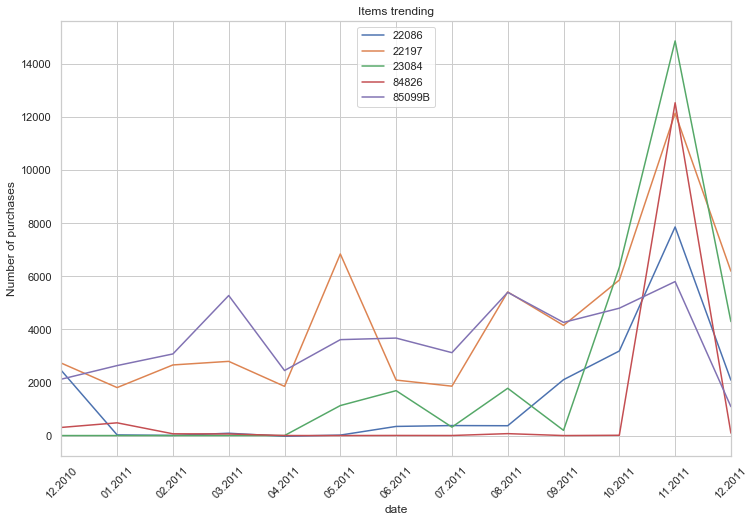

In [204]:
#Plotting the trend

ax = pd.DataFrame(trending_items_over_time_M).plot(figsize=(12,8), grid=True)
ax.set_ylabel("Number of purchases")
ax.set_xlabel('date')
ax.set_title('Items trending')

ax.legend(trending_items_over_time_M.columns, loc='upper center')

plt.xticks(ticks=trending_items_over_time_M.index,labels=trending_items_over_time_M.index.strftime("%m.%Y") ,rotation = 45 )

plt.show()